# Assignment : EDA

# EDA 1 : BIKE DETAILS

In [1]:
# importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BIKE DETAILS.csv')

In [3]:
df.shape

(1061, 7)

In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [5]:
# 1 What is the range of selling prices in the dataset.
print(f' Selling Price Range : {df["selling_price"].min()} - {df["selling_price"].max()}')

 Selling Price Range : 5000 - 760000


In [6]:
# 2 What is the median selling price for bikes in the dataset?

print(f' Median Selling Price : {df["selling_price"].median()}')


 Median Selling Price : 45000.0


In [7]:
# 3 What is the most common seller type?
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [8]:
# Most common seller type : Individual

In [9]:
# 4.  How many bikes have driven more than 50,000 kilometers?
df[df['km_driven'] > 50000].shape[0]

170

In [10]:
# 170 bikes have driven more then 50,000 kilometers

In [11]:
# 5. What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [12]:
# 6.  What proportion of bikes are from the year 2015 or older?
proportion = df[df['year'] <= 2015].shape[0] / df.shape[0]
print(f' Proportion of bikes are from the year 2015 or older : {proportion:.2%}')

 Proportion of bikes are from the year 2015 or older : 56.64%


In [13]:
# 7.  What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
print(f' Trend of missing values across the dataset : \n {missing_values}')

 Trend of missing values across the dataset : 
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [14]:
# 8. B What is the highest ex_showroom_price recorded, and for which bike?
df[df['ex_showroom_price'] == df['ex_showroom_price'].max()]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [15]:
# Highest Ex Showroom price is 1278000 for the Harley-Davidson Street Bob bike

In [16]:
# 9. What is the total number of bikes listed by each seller type?
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [17]:
# 10.  What is the relationship between selling_price and km_driven for first-owner bikes?
df[df['owner'] == 'First Owner']['selling_price'].corr(df[df['owner'] == 'First Owner']['km_driven'])

nan

In [18]:
# No relationship between selling price and km_driven

In [19]:
# 11. Identify and remove outliers in the km_driven column using the IQR method?
Q1 = df['km_driven'].quantile(0.25)
Q2 = df['km_driven'].quantile(0.50)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

<Axes: ylabel='km_driven'>

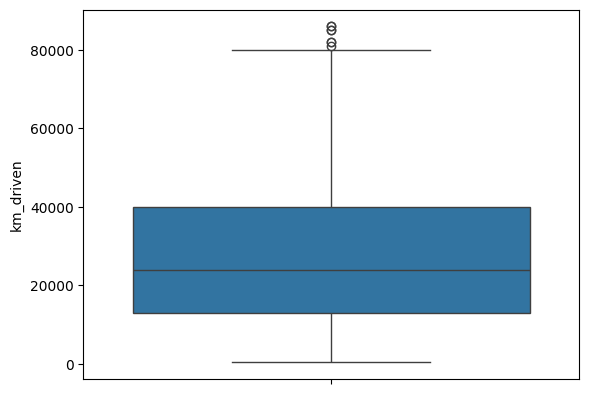

In [20]:
sns.boxplot(df['km_driven'])

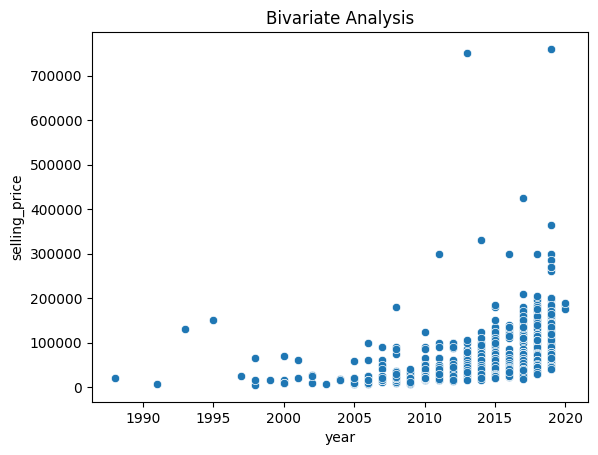

In [21]:
# Perform a bivariate analysis to visualize the relationship between year and selling_price?
sns.scatterplot(x= 'year', y= 'selling_price', data= df)
plt.title('Bivariate Analysis')
plt.show()

In [22]:
# 12.  What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
df['age'] = 2025 - df['year']
df.groupby('age')['depreciation'].mean()

,depreciation
age,
5,-34260.000000
6,2954.562500
7,13023.194805
8,22307.226190
9,28750.407407
10,28314.291139
11,34287.812500
12,42766.423077
13,36609.529412


In [23]:
# 14. Which bike names are priced significantly above the average price for their manufacturing year?
avg_price_by_year = df.groupby('year')['selling_price'].mean()
df[df['selling_price'] > df['year'].map(avg_price_by_year)]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,depreciation,age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,NaN,6
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,-1886.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,24643.0,10
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN,NaN,17
13,Yamaha YZF R3,365000,2019,Individual,1st owner,1127,351680.0,-13320.0,6
...,...,...,...,...,...,...,...,...,...
1004,Bajaj Pulsar NS 200,60000,2016,Individual,1st owner,25000,99000.0,39000.0,9
1005,TVS Apache RTR 160,60000,2014,Individual,1st owner,19000,81000.0,21000.0,11
1008,Bajaj Pulsar 220 F,52000,2012,Individual,1st owner,45000,94000.0,42000.0,13
1012,Bajaj Pulsar NS 200,50000,2014,Individual,1st owner,13000,99000.0,49000.0,11


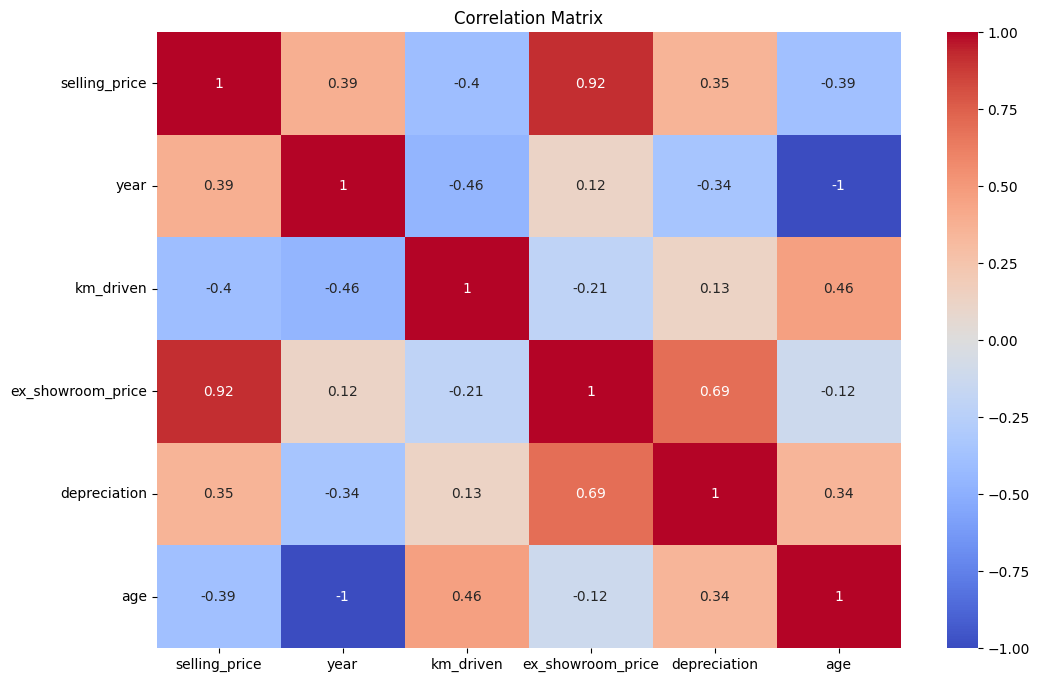

In [24]:
# 15. Develop a correlation matrix for numeric columns and visualize it using a heatmap?
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# EDA2 : Car Sales

In [25]:
df1 = pd.read_csv('Car Sale.csv')

In [26]:
df1.shape

(23906, 16)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [28]:
df1.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [29]:
# 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
df1.groupby('Dealer_Name')['Price ($)'].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


In [30]:
# 2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
df1.groupby('Company')['Price ($)'].std().sort_values(ascending = False)

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


In [31]:
# lincoln company has the highest price variation
# highest price variation car brand has budget and luxury offering
# low price variation car brand target a specific market segment

In [32]:
# 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
df1.groupby('Transmission')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


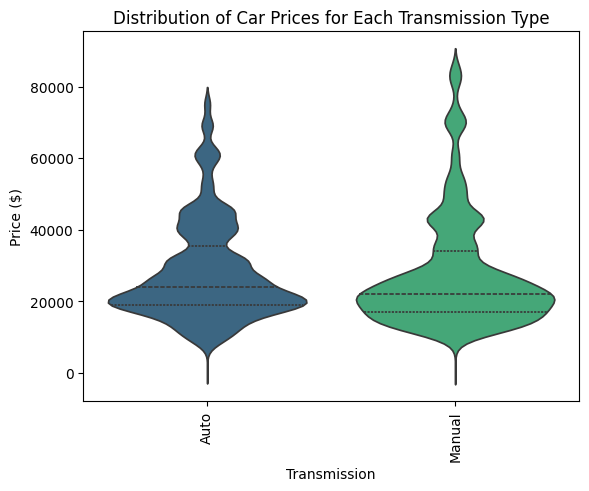

In [33]:
sns.violinplot(data = df1, x = 'Transmission', y = 'Price ($)', palette = 'viridis', inner = 'quartile')
plt.title('Distribution of Car Prices for Each Transmission Type')
plt.xticks(rotation = 90)
plt.show()

In [34]:
# 4.  What is the distribution of car prices across different regions?
df1.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


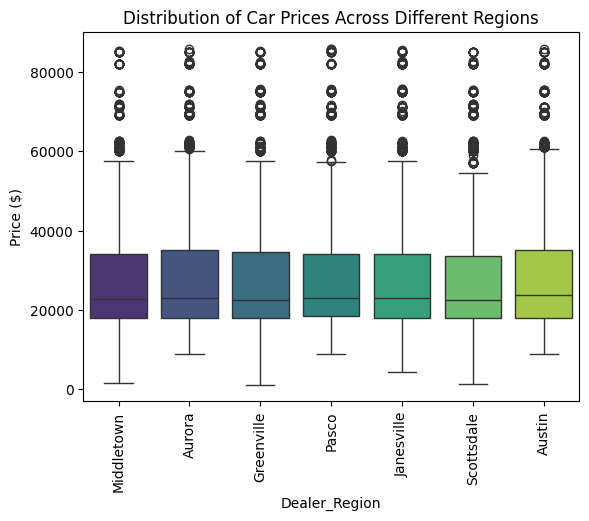

In [35]:
sns.boxplot(data = df1, x = 'Dealer_Region', y = 'Price ($)', palette = 'viridis')
plt.title('Distribution of Car Prices Across Different Regions')
plt.xticks(rotation = 90)
plt.show()

In [36]:
# 5.What is the distribution of cars based on body styles?
df1['Body Style'].describe()

,Body Style
count,23906
unique,5
top,SUV
freq,6374


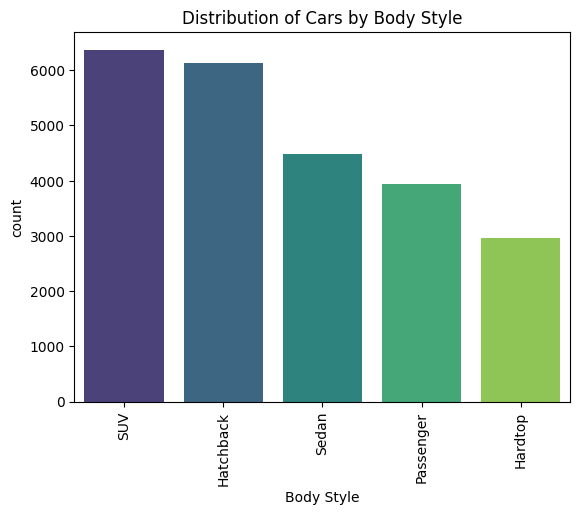

In [37]:
sns.countplot(data=df1, x='Body Style', order=df1['Body Style'].value_counts().index, palette='viridis')
plt.title('Distribution of Cars by Body Style')
plt.xticks(rotation=90)
plt.show()

In [38]:
# 6.  How does the average selling price of cars vary by customer gender and annual income?
avg_sel_price = df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean().reset_index()
avg_sel_price

,Gender,Annual Income,Price ($)
0,Female,13500,28132.038732
1,Female,106000,46001.000000
2,Female,121000,20000.000000
3,Female,190000,19001.000000
4,Female,211000,51000.000000
...,...,...,...
3437,Male,6600000,39000.000000
3438,Male,6800000,15000.000000
3439,Male,7650000,21000.000000
3440,Male,8000000,85000.000000


Text(0, 0.5, 'Average Selling Price')

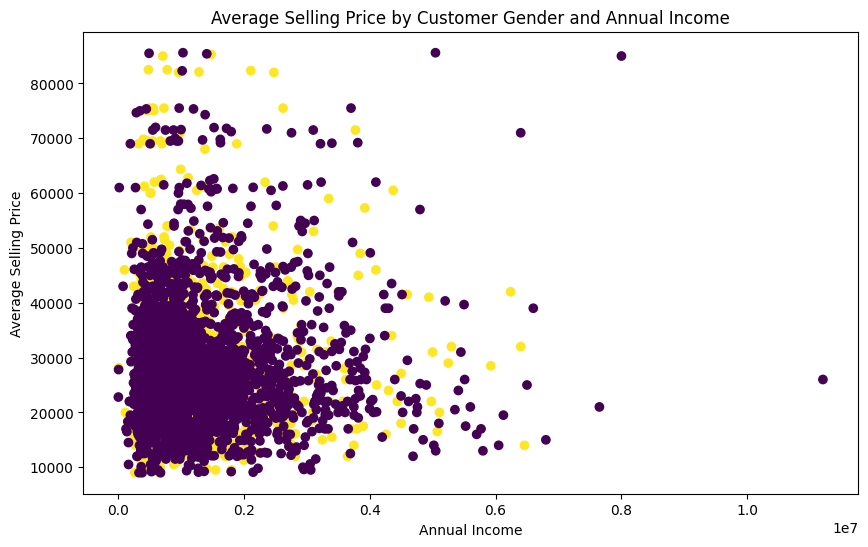

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_sel_price['Annual Income'], avg_sel_price['Price ($)'], c=avg_sel_price['Gender'].map({'Male': 0, 'Female': 1}), cmap='viridis')
plt.title('Average Selling Price by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')

In [40]:
# 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
df1.groupby('Dealer_Region')['Price ($)'].describe()

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


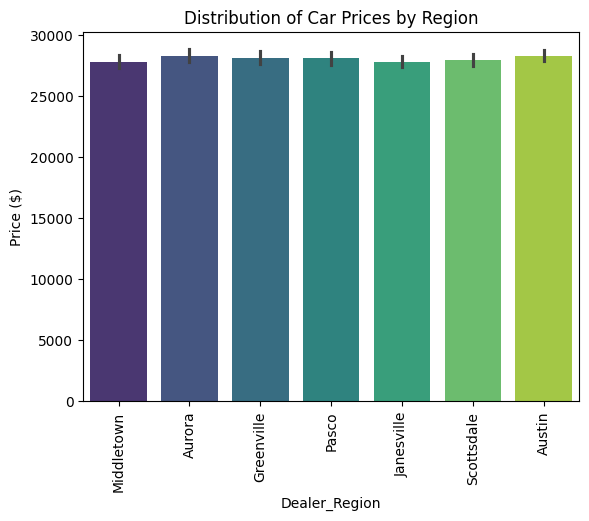

In [41]:
sns.barplot(data = df1, x = 'Dealer_Region', y = 'Price ($)', palette = 'viridis')
plt.title('Distribution of Car Prices by Region')
plt.xticks(rotation = 90)
plt.show()

In [42]:
# 8.  How does the average car price differ between cars with different engine sizes?
df1.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()

,Model,Engine,Price ($)
0,3-Sep,DoubleÂ Overhead Camshaft,37986.380117
1,3000GT,DoubleÂ Overhead Camshaft,22764.326923
2,3000GT,Overhead Camshaft,21770.659864
3,300M,DoubleÂ Overhead Camshaft,21394.888889
4,323i,DoubleÂ Overhead Camshaft,16744.632287
...,...,...,...
256,Windstar,Overhead Camshaft,17100.272727
257,Wrangler,DoubleÂ Overhead Camshaft,21145.294737
258,Wrangler,Overhead Camshaft,18742.942029
259,Xterra,DoubleÂ Overhead Camshaft,15940.459459


In [43]:
# 9.  How do car prices vary based on the customer’s annual income bracket.
# Define income brackets
bins = [0, 40000, 80000, 120000, 160000]  # Income ranges
labels = ['Low', 'Medium', 'High', 'Very High']

# Create a new column for income brackets
df1['Income Bracket'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels)

# Compute average car price for each income bracket
income_price_analysis = df1.groupby("Income Bracket")["Price ($)"].mean().reset_index()

# Rename columns for clarity
income_price_analysis.columns = ["Income Bracket", "Average Price ($)"]

# Display the results
income_price_analysis


,Income Bracket,Average Price ($)
0,Low,27884.297820
1,Medium,NaN
2,High,44500.500000
3,Very High,17857.428571


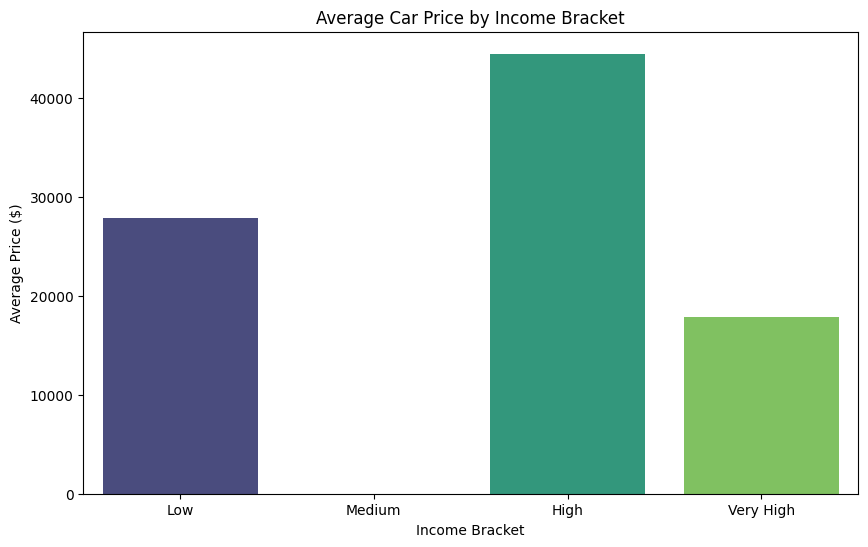

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Bracket', y='Average Price ($)', data=income_price_analysis, palette='viridis')
plt.title('Average Car Price by Income Bracket')
plt.show()

In [45]:
# 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top5_models = df1['Model'].value_counts().nlargest(5).index
top_models_df = df1[df1['Model'].isin(top5_models)]
top5_models = df1['Model'].value_counts().nlargest(5).reset_index()
top5_models.columns = ['Model', 'Count']
top5_models

,Model,Count
0,Diamante,418
1,Silhouette,411
2,Prizm,411
3,Passat,391
4,Ram Pickup,383


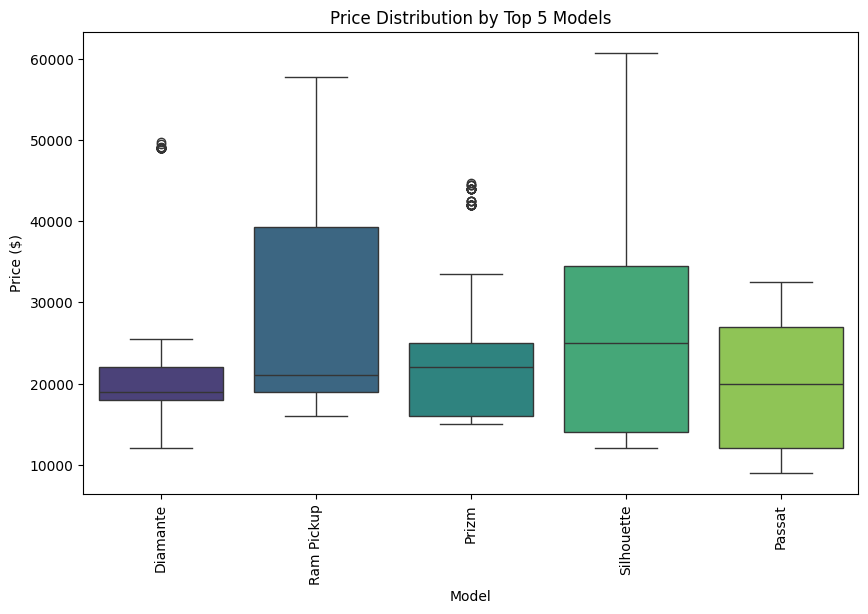

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='Price ($)', data=top_models_df, palette='viridis')
plt.title('Price Distribution by Top 5 Models')
plt.xticks(rotation=90)
plt.show()

In [47]:
df1['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [48]:
# 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

# Group by color and engine type, then calculate price statistics
price_variation = df1.groupby(["Color", "Engine"])["Price ($)"].agg(["mean", "std", "min", "max", "count"]).reset_index()

# Calculate price variation (standard deviation) for each color
color_variation = price_variation.groupby("Color")["std"].mean().reset_index().rename(columns={"std": "Price Variation"})

# Sort colors by highest price variation
color_variation_sorted = color_variation.sort_values(by="Price Variation", ascending=False)

# Display the top colors with the highest price variation
color_variation_sorted.head(10)


,Color,Price Variation
2,Red,15422.998401
0,Black,14938.039736
1,Pale White,13701.258231


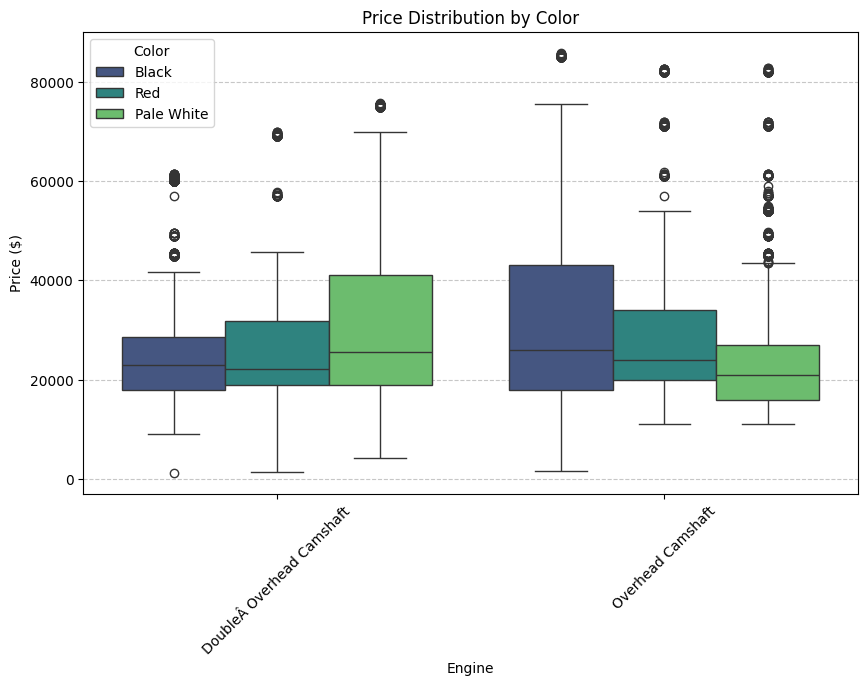

In [49]:
# visualization

plt.figure(figsize=(10,6))
sns.boxplot(data = df1, x = 'Engine', y = 'Price ($)',hue = 'Color', palette = 'viridis')
plt.title('Price Distribution by Color')
plt.xticks(rotation = 45)
plt.grid(axis= 'y', linestyle = '--', alpha = 0.7)
plt.show()

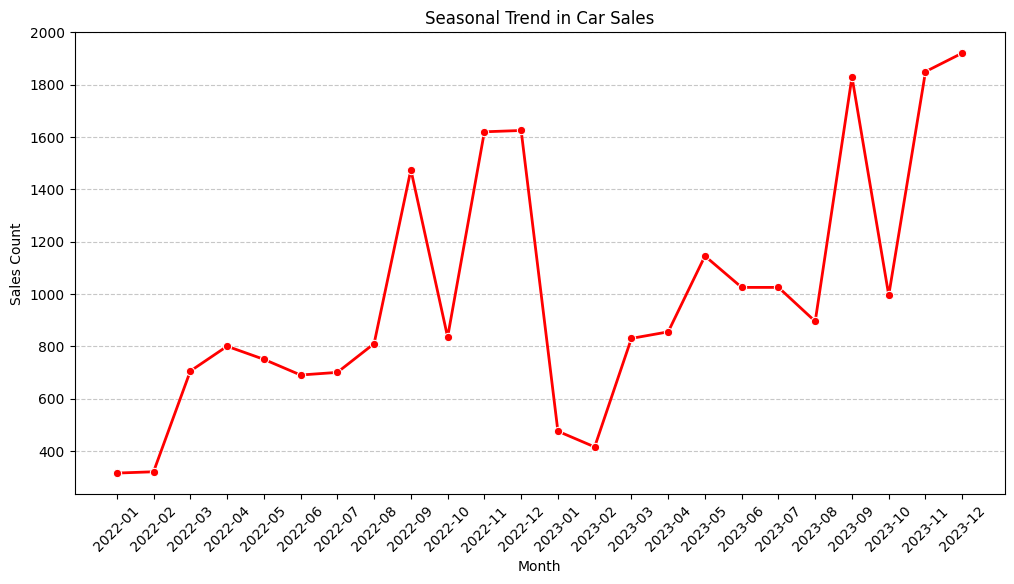

In [50]:
# 12.  Is there any seasonal trend in car sales based on the date of sale?
df1['Date'] = pd.to_datetime(df1['Date'], errors = 'coerce')
df1['Month'] = df1['Date'].dt.to_period('M')
monthly_sales = df1.groupby('Month')['Car_id'].count().reset_index().rename(columns={'Car_id': 'Sales Count'})
monthly_sales['Month'] = monthly_sales['Month'].astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Sales Count', data=monthly_sales, marker='o', linestyle='-', color='red', linewidth=2)
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

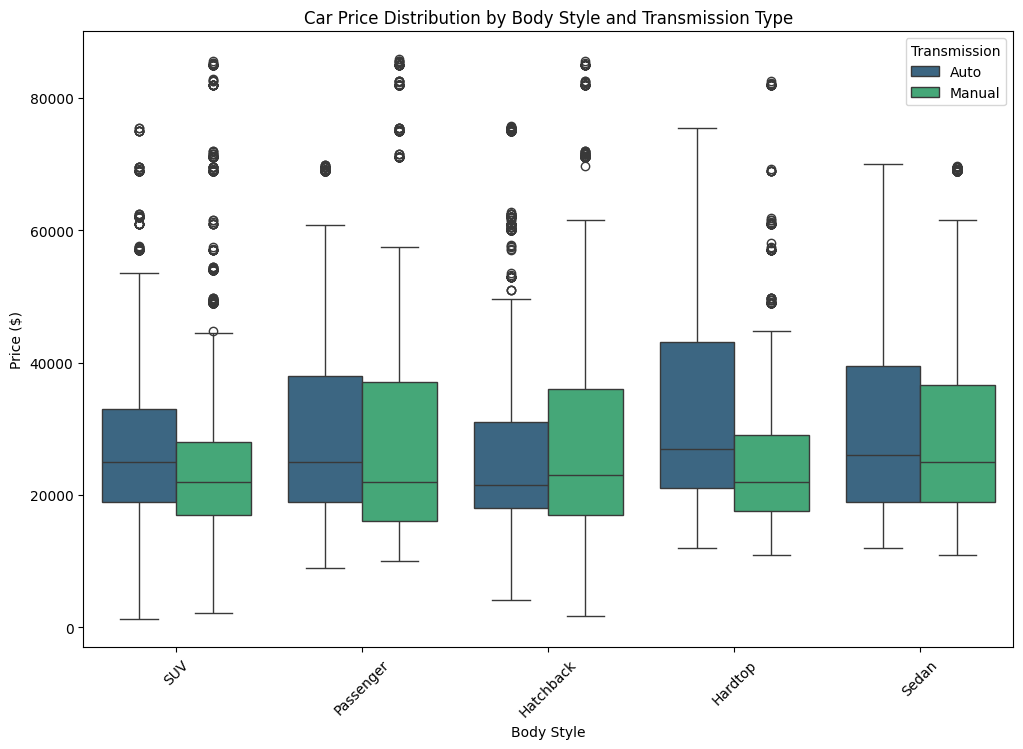

In [51]:
# 13.  How does the car price distribution change when considering different combinations of body style and transmission type?

plt.figure(figsize=(12,8))
sns.boxplot(data = df1, x = 'Body Style', y = 'Price ($)', hue = 'Transmission', palette = 'viridis')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

In [52]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income Bracket', 'Month'],
      dtype='object')

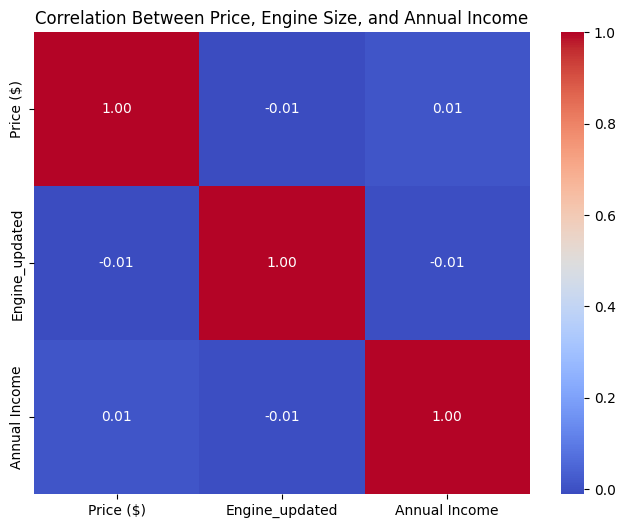

In [53]:
# 14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
df1['Engine_updated'] = df1['Engine'].replace({'DoubleÂ\xa0Overhead Camshaft':0,'Overhead Camshaft':1})

corr_matrix = df1[['Price ($)', 'Engine_updated', 'Annual Income']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Price, Engine Size, and Annual Income')
plt.show()

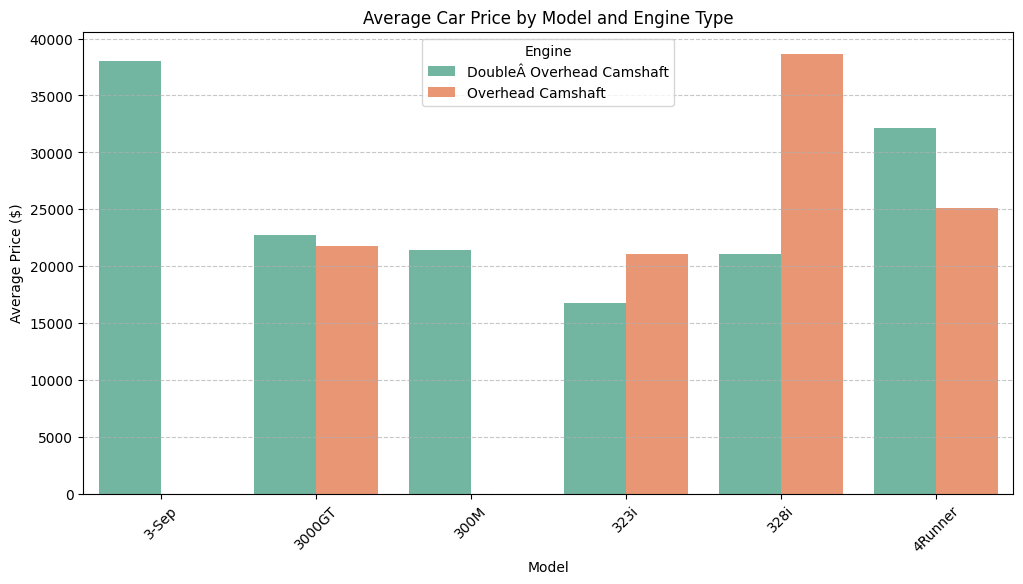

In [54]:
# 15.  How does the average car price vary across different car models and engine types?
avg_car_price_var = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()

top_models = avg_car_price_var.head(10)
plt.figure(figsize=(12,6))
sns.barplot(data = top_models, x = 'Model', y = 'Price ($)', hue = 'Engine', palette = 'Set2')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha =0.7)
plt.show()

# EDA 3 : Amazon Sales Data

In [55]:
df2 = pd.read_csv('amazon.csv')

In [56]:
df2.head(4)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...


In [57]:
df2.shape

(1465, 16)

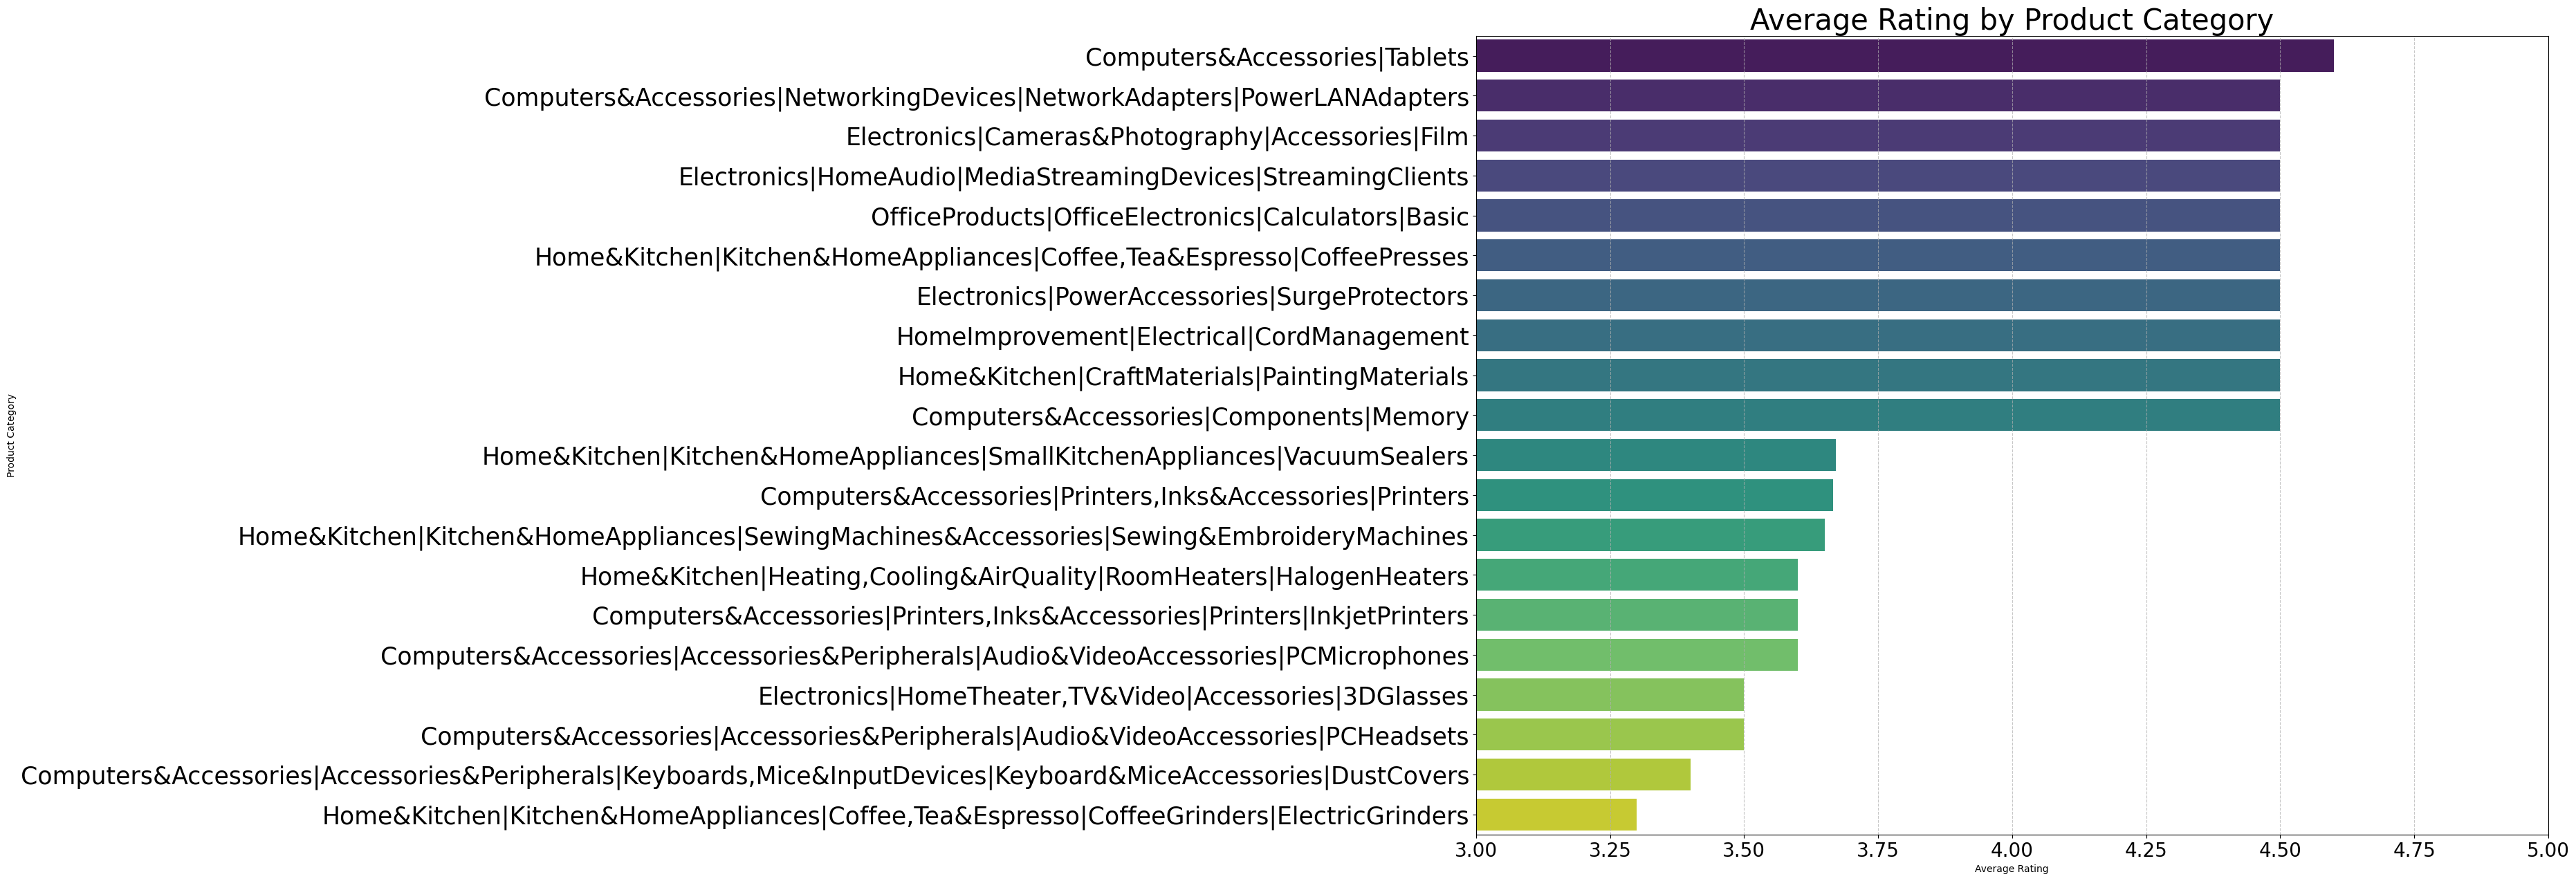

In [58]:
# 1.What is the average rating for each product category?

#convert in numeric
df2['rating'] = pd.to_numeric(df2['rating'], errors = 'coerce')
# avgerage of rating by category
avg_rating_by_category = df2.groupby('category')['rating'].mean().sort_values(ascending = False).reset_index()
# top 10 rating
top_10_rating = avg_rating_by_category.head(10)
# bottom 10 rating
bottom_10_rating = avg_rating_by_category.tail(10)
category_plot = pd.concat([top_10_rating, bottom_10_rating])

plt.figure(figsize=(20, 15))
sns.barplot(y='category', x='rating', data=category_plot, palette='viridis')
plt.title('Average Rating by Product Category',fontsize = 30)
plt.xlabel("Average Rating")
plt.ylabel("Product Category")
plt.xlim(3, 5)  # Ratings are between 3 and 5
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [60]:
# 2.  What are the top rating_count products by category?
df2.dropna(subset = ['rating_count'], inplace = True)

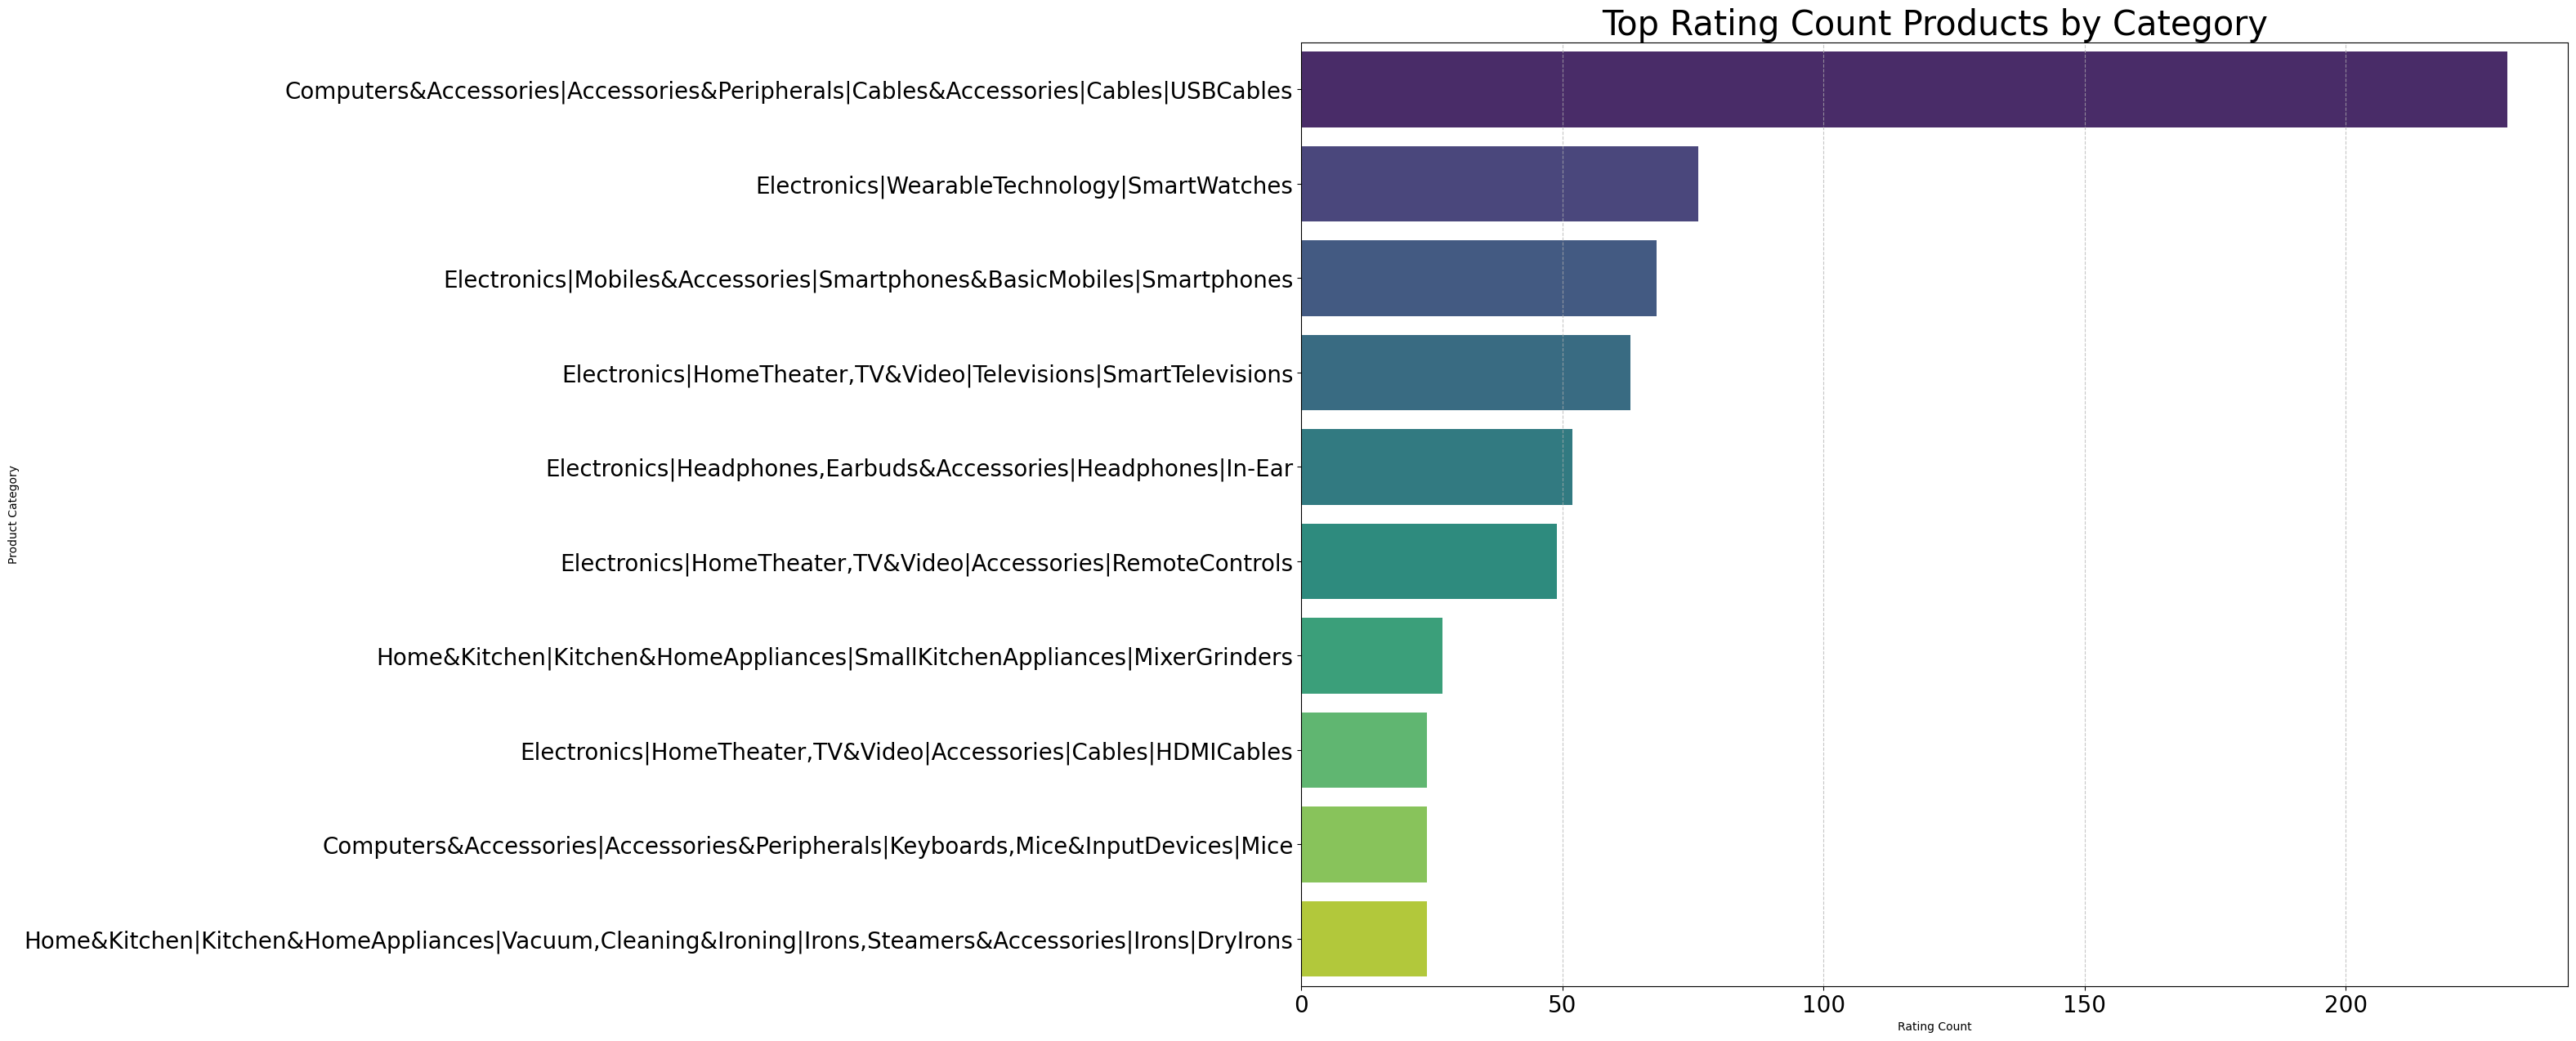

In [124]:
top_10_rating_count = df2.groupby('category')['rating_count'].count().sort_values(ascending = False).reset_index().head(10)

plt.figure(figsize=(20, 15))
sns.barplot(y='category', x='rating_count', data=top_10_rating_count, palette='viridis')
plt.title('Top Rating Count Products by Category', fontsize = 30)
plt.xlabel("Rating Count")
plt.ylabel("Product Category")
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [62]:
# 3. What is the distribution of discounted prices vs. actual prices?


In [66]:
df2["actual_price"] = pd.to_numeric(df2["actual_price"].replace(r"[^\d.]", "", regex=True), errors="coerce")
df2["discounted_price"] = pd.to_numeric(df2["discounted_price"].replace(r"[^\d.]", "", regex=True), errors="coerce")


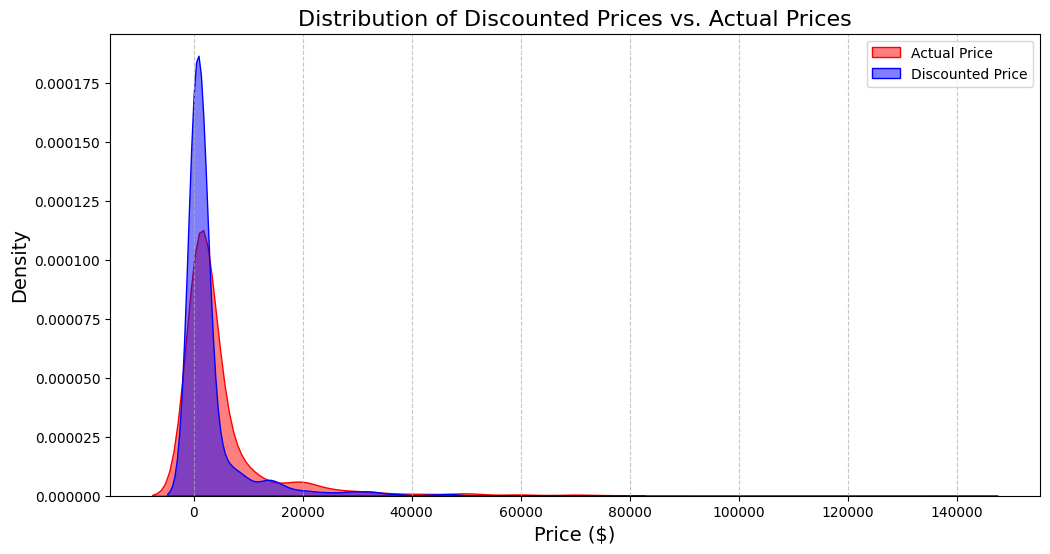

In [71]:
plt.figure(figsize=(12, 6))

sns.kdeplot(df2["actual_price"], label="Actual Price", fill=True, color="red", alpha=0.5)
sns.kdeplot(df2["discounted_price"], label="Discounted Price", fill=True, color="blue", alpha=0.5)

plt.title("Distribution of Discounted Prices vs. Actual Prices", fontsize=16)
plt.xlabel("Price ($)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [77]:
# 4. How does the average discount percentage vary across categories?
df2['discount_percentage'] = df2['discount_percentage'].str.replace('%', '').astype(float)

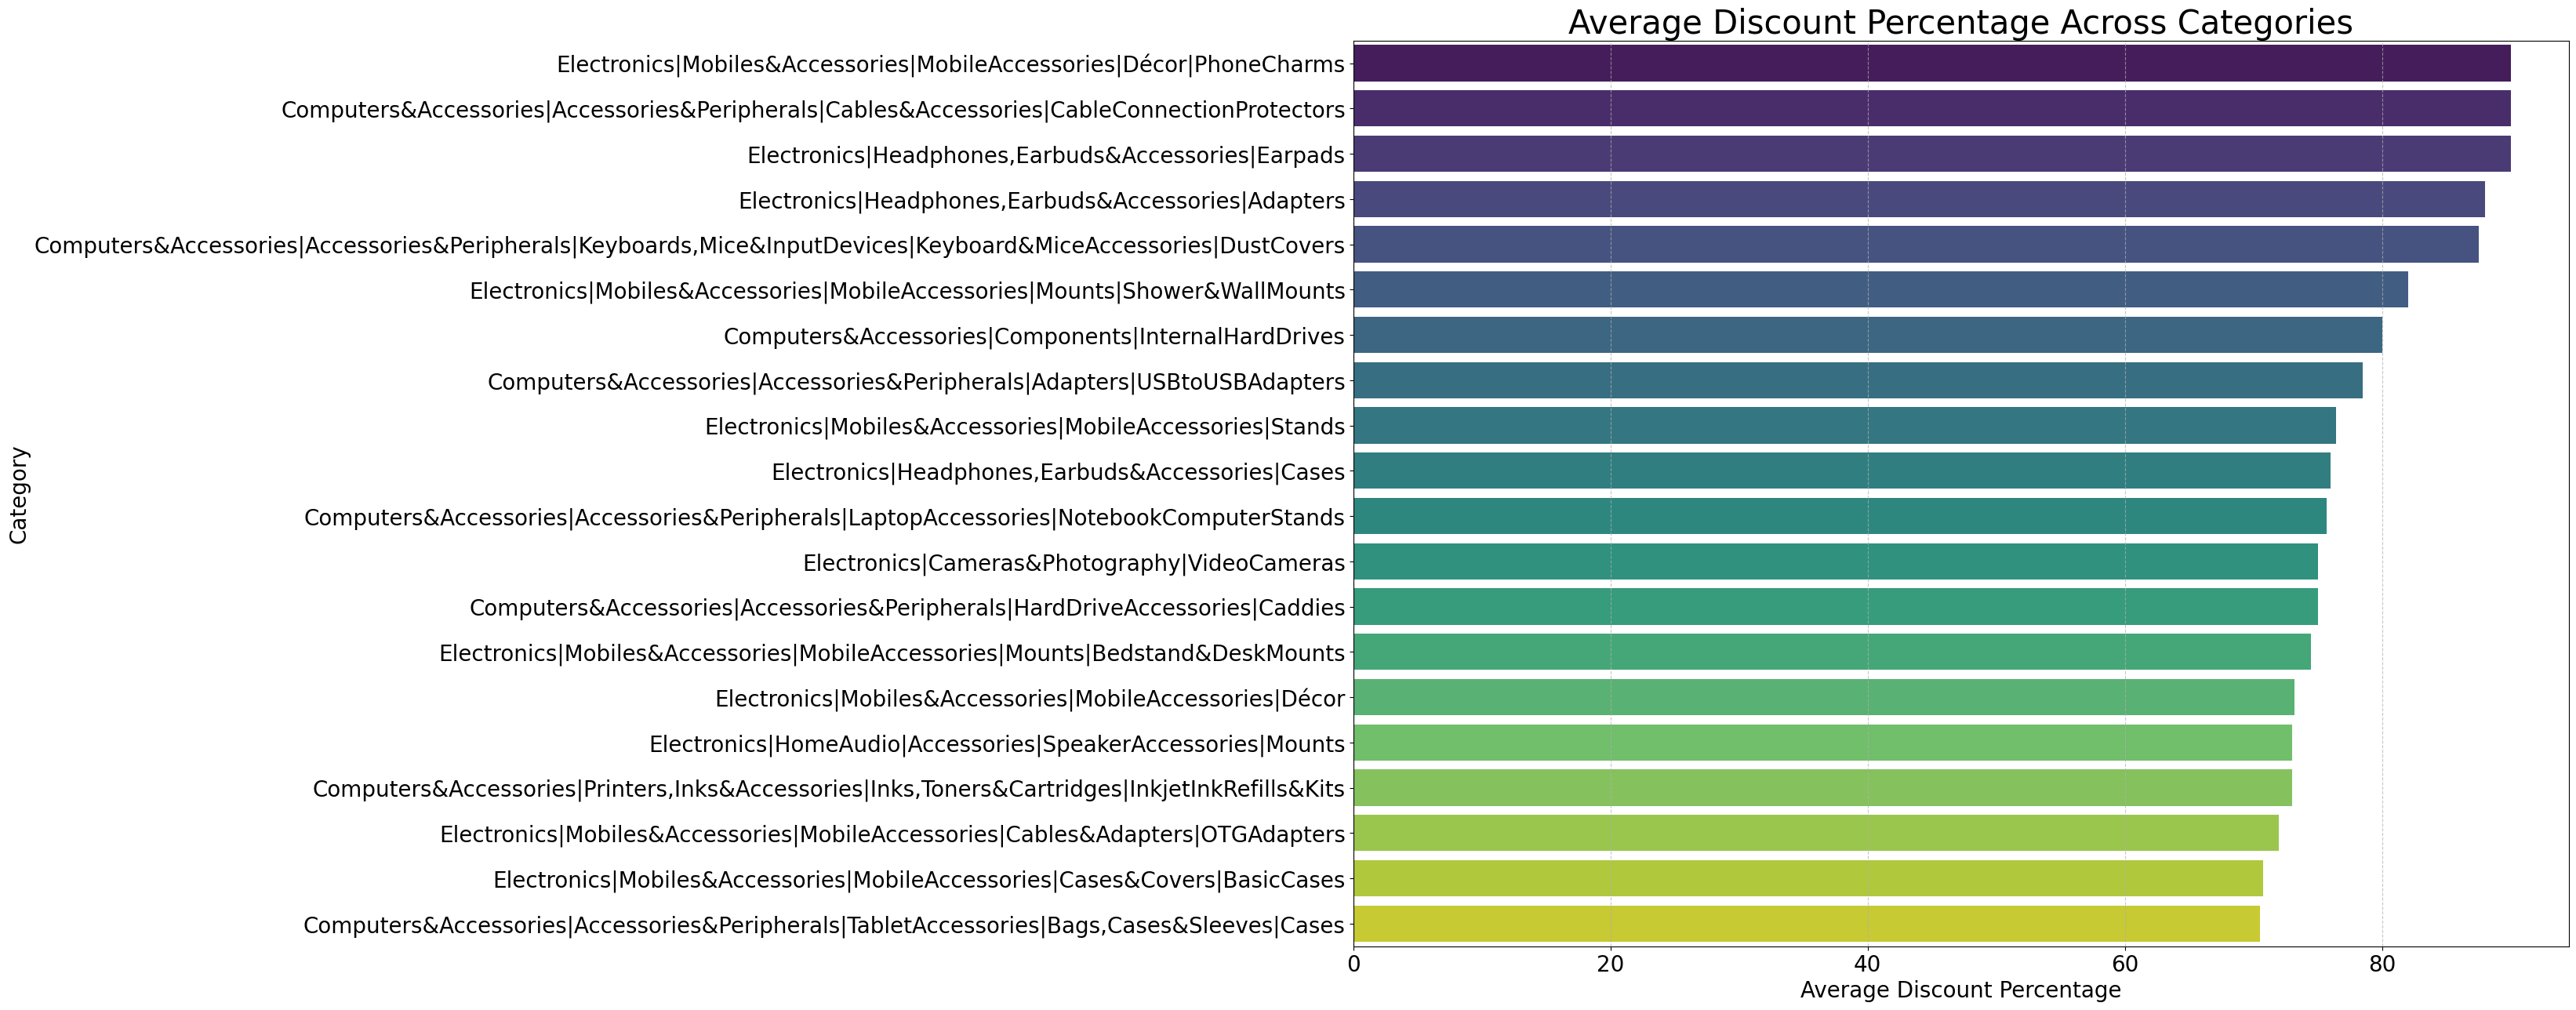

In [87]:
avg_discount_by_category = df2.groupby('category')['discount_percentage'].mean().sort_values(ascending = False).reset_index()
top_20_discount = avg_discount_by_category.head(20)
plt.figure(figsize=(20, 15))
sns.barplot(data=top_20_discount, y="category", x="discount_percentage", palette="viridis")

plt.title("Average Discount Percentage Across Categories", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Average Discount Percentage", fontsize=20)
plt.ylabel("Category", fontsize=20)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()

In [89]:
# What are the most popular product names?
popular_products = df2['product_name'].value_counts().head(10)
popular_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Pinnaclz Original Combo of 2 Micro USB Fast Charging Cable, USB Charging Cable for Data Transfer Perfect for Android Smart Phones White 1.2 Meter Made in India (Pack of 2)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Fire-Boltt Visionary 1.78"" AMOLED Bluetooth Calling Smartwatch with 368*448 Pixel Resolution 100+ Sports Mode, TWS Connection, Voice Assistance, SPO2 & Heart Rate Monitoring",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


In [96]:
# 6.  What are the most popular product keywords?
df2['product_name'].str.split().explode().value_counts().head(10)

,count
product_name,
with,717
for,614
|,456
&,432
USB,342
and,310
Cable,304
-,218
Charging,210


In [117]:
# 7. What are the most popular product review?
review_rating_stats = df2.groupby("review_content").agg(
    count=("review_content", "count"),  # Number of times review appears
    avg_rating=("rating", "mean")    # Average rating of review
).reset_index()

# Sort by highest rating first, then by count (most frequent among highest-rated)
top_rated_reviews = review_rating_stats.sort_values(by=["avg_rating", "count"], ascending=[False, False])

# Display top 10 highest-rated reviews
top_rated_reviews.head(10)

,review_content,count,avg_rating
421,I really like this wireless mouse it has becam...,1,5.0
755,Product is good in quality. Working good with ...,1,5.0
384,I have used multiple air fryers. But this one ...,1,4.8
616,Must buy best Fabulous product I recommend thi...,1,4.8
715,"Overall, I love this Oratech Coffee frother an...",1,4.8
388,"I like instant heating, I didn't get warranty ...",1,4.7
486,It is easy to install at home. The kit has all...,1,4.7
892,The delivery people were not careful with the ...,1,4.7
896,The first time I tried it send the eggs and th...,1,4.7
1043,"Value for money,Not as effective as claimed, j...",1,4.7


In [59]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [119]:
# 8. What is the correlation between discounted_price and rating?
corr_matrix = df2[['discounted_price', 'rating']].corr()
corr_matrix

,discounted_price,rating
discounted_price,1.000000,0.121132
rating,0.121132,1.000000


In [120]:
# 9.  What are the Top 5 categories based on the highest ratings?
df2.groupby('category')['rating'].mean().sort_values(ascending = False).head(5)

,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5
OfficeProducts|OfficeElectronics|Calculators|Basic,4.5


In [121]:
# 10. Identify any potential areas for improvement or optimization based on the data analysis?
# Optimize product listings by using high-ranking keywords in titles and descriptions.